In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import median, gaussian, prewitt, prewitt_h, prewitt_v, threshold_otsu

In [2]:
def histogram_strech(image, target_min, target_max, isFloat=False):
    """
    Stretches an image to a custom range of values.
    
    Parameters:
    -----------
    image : ndarray
        Input image (float or uint8)
    target_min : float or int
        Desired minimum value for the output image
    target_max : float or int
        Desired maximum value for the output image
    isFloat : bool
        If True, assumes input is float image (-1 to 1)
        If False, assumes input is uint8 image (0 to 255)
        
    Returns:
    --------
    ndarray
        Stretched image with values between target_min and target_max
    """
    
    # Make a copy to avoid modifying the original
    img = image.copy()
    
    # Get current min and max values
    current_min = np.min(img)
    current_max = np.max(img)
    
    # Handle empty range case
    if current_min == current_max:
        return np.full_like(img, target_min)
    
    # Define input range based on image type
    if isFloat:
        input_min = -1.0
        input_max = 1.0
    else:
        input_min = 0
        input_max = 255
    
    # First normalize to 0-1 range
    normalized = (img - current_min) / (current_max - current_min)
    
    # Then scale to input range
    scaled = normalized * (input_max - input_min) + input_min
    
    # Finally stretch to target range
    stretched = (scaled - input_min) / (input_max - input_min) * (target_max - target_min) + target_min
    
    return stretched

(np.float64(-0.5), np.float64(857.5), np.float64(472.5), np.float64(-0.5))

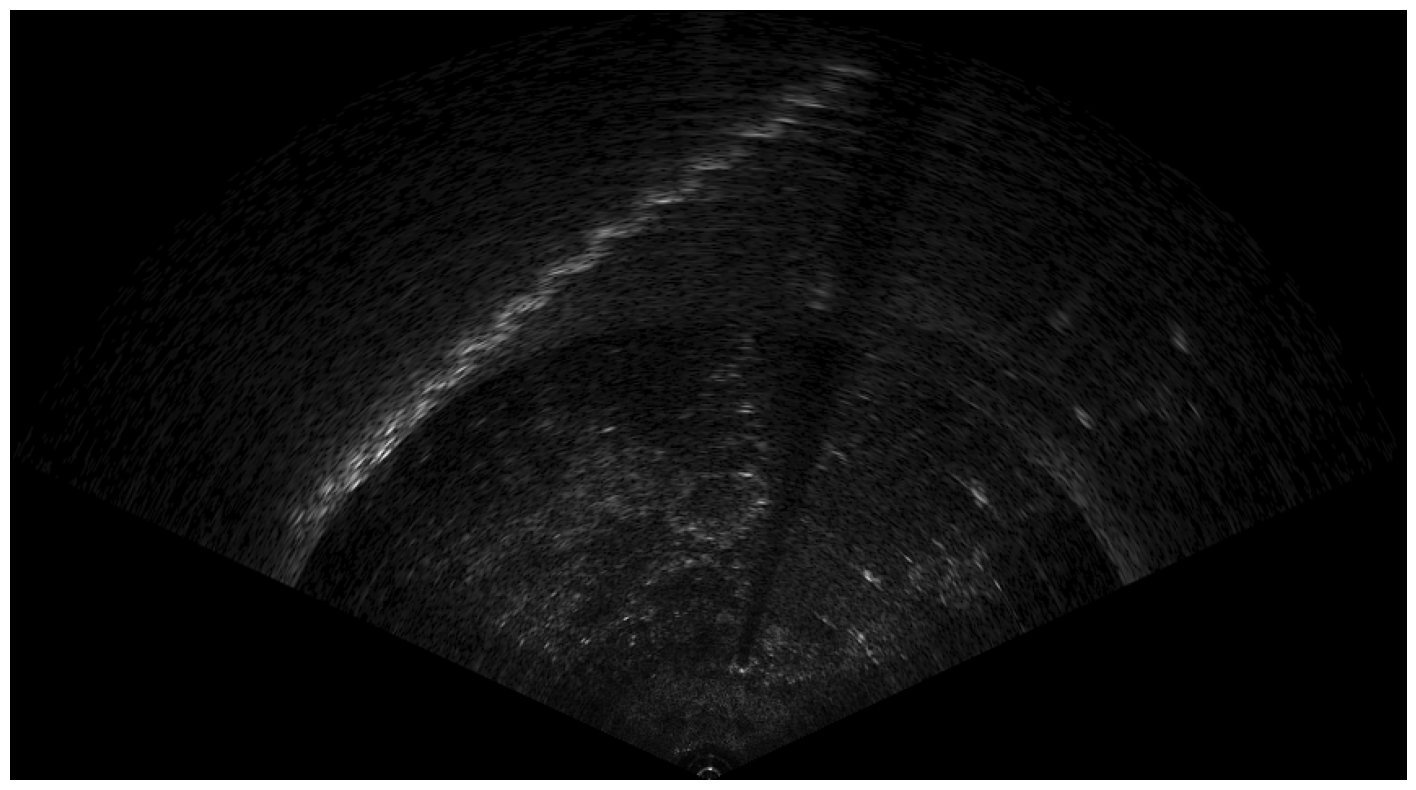

In [6]:
img = np.load("cart_image.npy")
plt.figure(figsize=(20, 10))
plt.imshow(img, cmap="gray")
plt.axis("off")

(np.float64(-0.5), np.float64(857.5), np.float64(472.5), np.float64(-0.5))

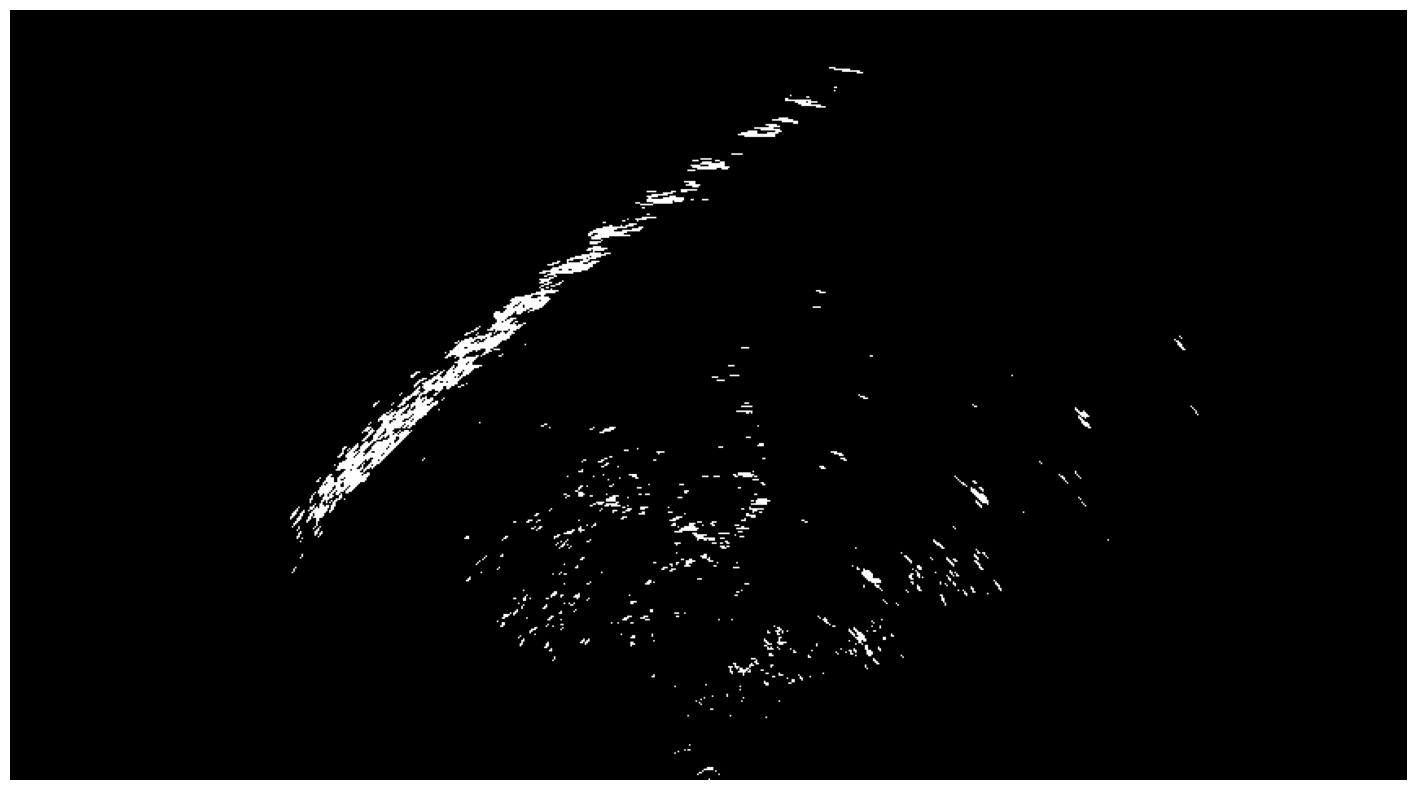

In [13]:
binary_image = img > 60
plt.figure(figsize=(20, 10))
plt.imshow(binary_image, cmap="gray")
plt.axis("off")